In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('FB.csv', parse_dates = True)

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [6]:
df.shape[0]

1259

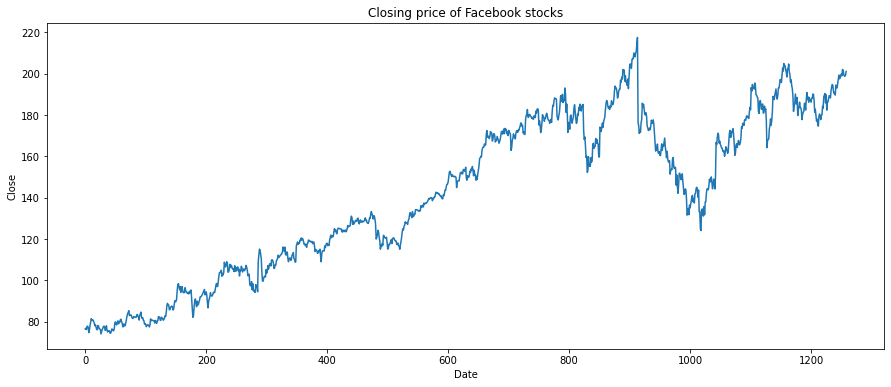

In [7]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Facebook stocks")
plt.show()

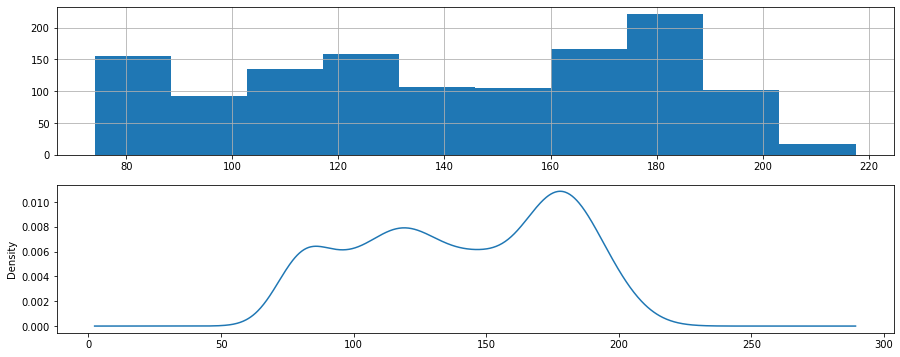

In [8]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [9]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [10]:

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [11]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [12]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [14]:
train.shape[0]

1229

In [15]:
train.to_json('train.json',orient='records',lines=True)

In [16]:
test.to_json('test.json',orient='records',lines=True)

In [17]:
arima_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5926.792, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5930.825, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5930.810, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5928.648, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5928.521, Time=1.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5930.139, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5932.491, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5932.541, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5927.184, Time=0.29 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.356 seconds


In [18]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1229
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2959.396
Date:                Wed, 18 Aug 2021   AIC                           5926.792
Time:                        14:56:53   BIC                           5947.245
Sample:                             0   HQIC                          5934.488
                               - 1229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0122      0.012      1.046      0.296      -0.011       0.035
ar.L1          0.8631      0.087      9.910      0.000       0.692       1.034
ma.L1         -0.8999      0.076    -11.855      0.000      -1.049      -0.751
sigma2         7.2569      0.083     87.805      0.000       7.095       7.419
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):            112080.67
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
forecast,conf_int = arima_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [20]:
forecast2 = arima_model.predict(n_periods=10,return_conf_int=False)

In [21]:
forecast2

array([186.43351514, 186.49190421, 186.55450422, 186.62073864,
       186.69010987, 186.76218844, 186.83660368, 186.91303567,
       186.99120828, 187.07088321])

In [22]:
forecast.head()

,close_pred
0,186.433515
1,186.491904
2,186.554504
3,186.620739
4,186.690110


In [23]:
conf_int

array([[181.1536474 , 191.71338288],
       [179.16106966, 193.82273875],
       [177.72678533, 195.3822231 ],
       [176.58509294, 196.65638433],
       [175.63011821, 197.75010153],
       [174.8063349 , 198.71804198],
       [174.08021375, 199.5929936 ],
       [173.42967817, 200.39639316],
       [172.83931756, 201.14309901],
       [172.29791314, 201.84385329],
       [171.79703576, 202.50667378],
       [171.33019458, 203.13769628],
       [170.89229185, 203.7417121 ],
       [170.47925864, 204.32252567],
       [170.08780281, 204.88320088],
       [169.71522966, 205.42623538],
       [169.35931118, 205.95368717],
       [169.01818874, 206.4672681 ],
       [168.69029945, 206.96841438],
       [168.37431958, 207.45834044],
       [168.06912048, 207.93808054],
       [167.77373389, 208.40852152],
       [167.48732434, 208.87042856],
       [167.20916696, 209.32446586],
       [166.9386296 , 209.77121321],
       [166.67515821, 210.21117948],
       [166.41826484, 210.6448136 ],
 

In [24]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")

In [25]:
timeseries_evaluation_metrics_func(test,forecast)

Evaluation metric results:-
MSE is : 73.0162225718255
MSE is : 7.728152585668978
RMSE is : 8.544953046788818
MAPE is : 3.9183622263792204
R2 is : -2.98934892141766



In [26]:
forecast["new_index"] = range(1229, 1259)
forecast = forecast.set_index("new_index")

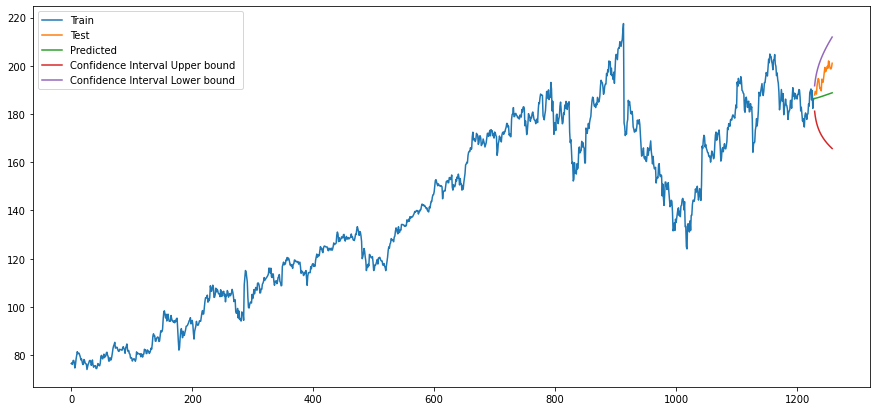

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

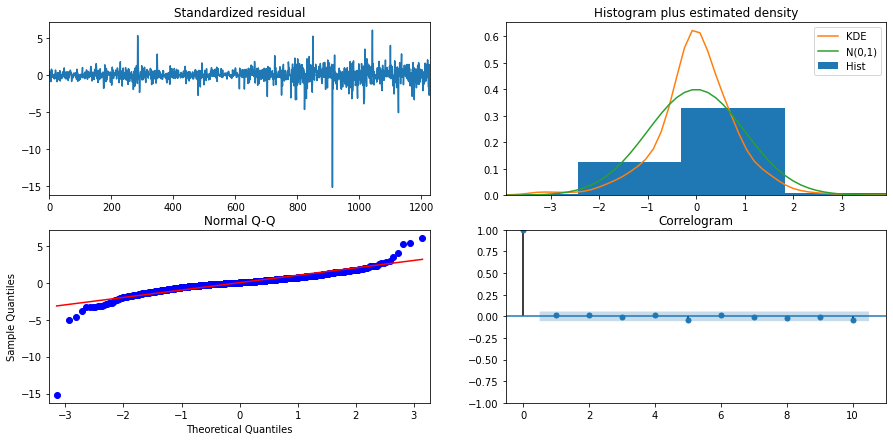

In [28]:
arima_model.plot_diagnostics();

In [38]:
import pickle
#save model to disk
pickle.dump(arima_model,open('Arima_model.pickle','wb'))

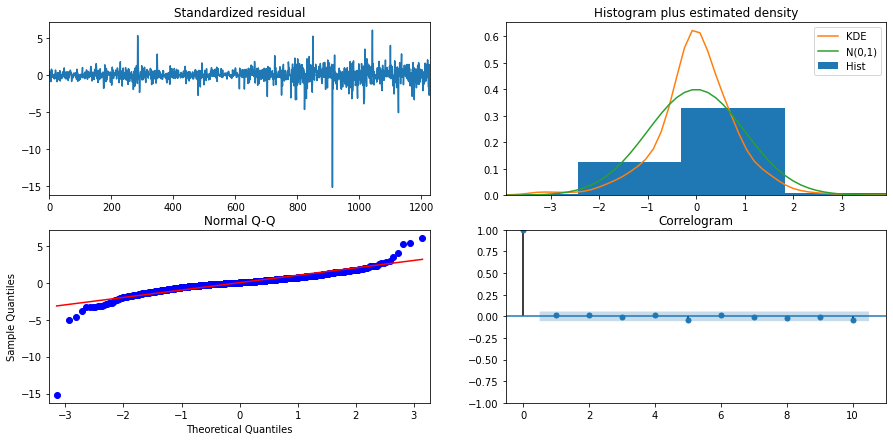

In [39]:
#load model from disk
loaded_model=pickle.load(open('Arima_model.pickle','rb'))
result = loaded_model.plot_diagnostics()

In [32]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.0
chardet==3.0.4
charset-normalizer==2.0.4
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=

In [33]:
#conforming to MOC

In [34]:
def begin():
    
    global arima_model
    
    # load pickled logistic regression model
    arima_model = pickle.load(open("Arima_model.pickle", "rb"))

In [35]:
def action(n):
    global df_forecast, df_conf
    
    forecast,conf_int = arima_model.predict(n_periods=n,return_conf_int=True)
    df_forecast = pd.DataFrame(forecast,columns=['close_pred'])
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    
    return df_forecast.to_dict(orient="records"),df_conf.to_dict(orient="records")

In [63]:
def metric(test):
  # Turn data into DataFrame
    data = pd.DataFrame(test)
    
    y_true = data['Close']
    y_pred = df_forecast
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return {'MSE':metrics.mean_squared_error(y_true, y_pred),'MAE': metrics.mean_absolute_error(y_true, y_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_true, y_pred)), 'MAPE':mean_absolute_percentage_error(y_true, y_pred),
           'R2':metrics.r2_score(y_true, y_pred)}

In [40]:
begin()

In [62]:
action(30)

([{'close_pred': 186.43351513623293},
  {'close_pred': 186.4919042051365},
  {'close_pred': 186.5545042164988},
  {'close_pred': 186.6207386367754},
  {'close_pred': 186.6901098674658},
  {'close_pred': 186.76218843786512},
  {'close_pred': 186.8366036774706},
  {'close_pred': 186.91303566545866},
  {'close_pred': 186.99120828238463},
  {'close_pred': 187.0708832131965},
  {'close_pred': 187.15185477131513},
  {'close_pred': 187.233945431366},
  {'close_pred': 187.3170019735391},
  {'close_pred': 187.40089215583663},
  {'close_pred': 187.48550184193388},
  {'close_pred': 187.57073252227394},
  {'close_pred': 187.65649917455707},
  {'close_pred': 187.74272841715742},
  {'close_pred': 187.82935691536125},
  {'close_pred': 187.9163300058122},
  {'close_pred': 188.00360050928816},
  {'close_pred': 188.0911277060246},
  {'close_pred': 188.1788764513296},
  {'close_pred': 188.26681641228296},
  {'close_pred': 188.35492140894124},
  {'close_pred': 188.44316884574042},
  {'close_pred': 188.531

In [42]:
test = pd.read_json('test.json',orient='records',lines=True)

In [43]:
test

,Close
0,187.889999
1,189.399994
2,189.309998
3,188.250000
4,191.649994
5,193.619995
6,194.720001
7,194.320007
8,191.550003
9,190.419998


In [64]:
metric(test)

Evaluation metric results:-
MSE is : 73.01622257182551
MAE is : 7.728152585668979
RMSE is : 8.544953046788818
MAPE is : 3.9194805355310254
R2 is : -2.9893489214176627



{'MAE': 7.728152585668979,
 'MAPE': 3.9194805355310254,
 'MSE': 73.01622257182551,
 'R2': -2.9893489214176627,
 'RMSE': 8.544953046788818}